In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import holoviews as hv

import numpy as np
import pandas as pd
import pickle as pk
from time import time

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets import widgets
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed, Button, HBox, VBox
# display(HTML("<style>.container { width:100% !important; }</style>"));
# style = {'description_width': '100px'};
# slider_layout = Layout(width='99%');

In [2]:
from Cluster import *

In [3]:
bd = BaseData('data_all_base')

reading in data from data_all_base ...
elapsed:  9.31213092803955


In [4]:
clusdtype='JRP1'
ClData = get_cluster_data(clusdtype)

reading in data from ./pks/data_cluster_JRP1.pk ...


In [5]:
exec(open('ClusterFit.py','r').read())

In [6]:
# from model_fits_age import *  # including ModelFit class definition.

**Consensus clustering and map**

In [15]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.
country_display = None
class_display = None
display_countries = None
chosen_country = 'Australia'
chosen_class = -1
current_class = -1
geog = None
geog1 = None
exec(open('Consensus.py','r').read());

In [16]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
clus = Consensus(ClData,cases = ['deaths', 'cases', 'cases_nonlinr']);


70 countries
reference clustering (numbered from 0) is 11


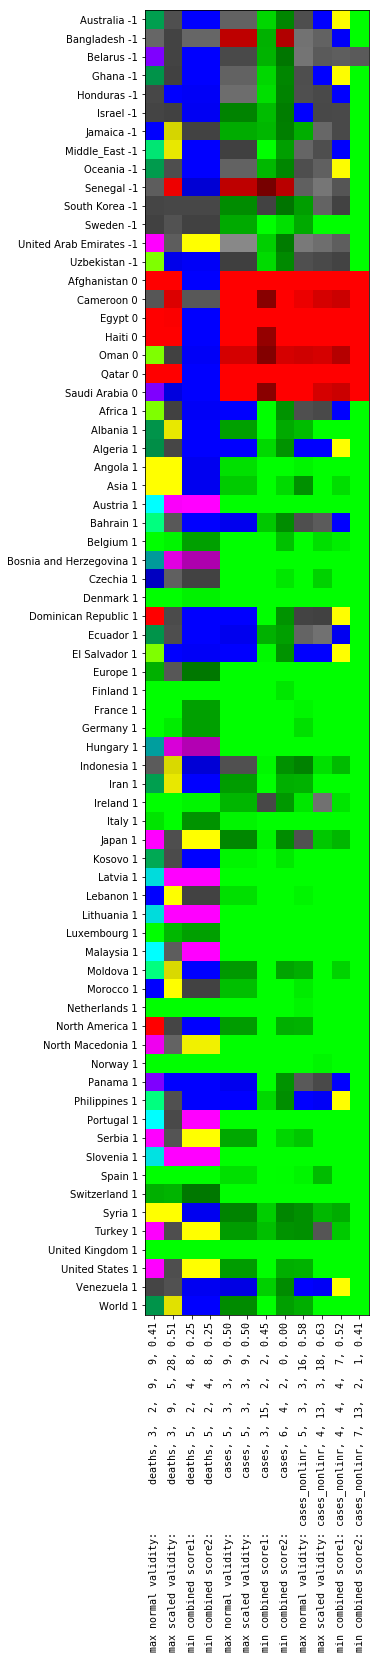

In [17]:
clus.scan()
clus.make_clusters()
clus.swizzle()
clus.plot_swiz()
chosen_swdic = clus.swdic

In [18]:
import io

classes = sprintdic(clus.swdic,chosen_country='Australia')
class_display = widgets.Textarea(value=classes,layout = widgets.Layout(height='280px'))

In [19]:
def myplot(cons, dataname='deaths',country='Australia'):
    try:
        if country in cons.countries:
            plt.plot(cons.cldata.clusdata_all[dataname][country])
    except:
        plt.plot(cons.cldata.clusdata_all[dataname]['Australia'])
display_countries = clus.countries        
country_display = interactive(myplot,cons=fixed(clus),dataname=clus.cases,country=clus.countries);

In [20]:
#display(country_display)
clus.make_map();

In [21]:
clus.map;
clus.map.min_height=600;

In [22]:
#line_button = Button(description="Lines");
#scat_button = Button(description="Scatter");
#button_section = HBox([line_button, scat_button]);
#right_box = VBox([button_section, country_display]);
mybox = HBox([country_display,class_display])
VBox([mybox,clus.map])     